# Week-1 Assignment

**Welcome to your first assignment for the SimuTech Winter Project 2022! I hope you are excited to implement and test everything you have learned up until now. There is an interesting set of questions for you to refine your acquired skills as you delve into hands-on coding and deepen your understanding of numpy, pandas, and data visualization libraries.**

P.S. You might find use of functions which you have never used before.So feel free to google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Section0 : Importing Libraries

*Let's begin by importing numpy, pandas and matplotlib.*

In [4]:
#your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Section1 : Playing with Python and Numpy

### Q1. Matrix Multiplication

##### (i) Check if matrix multiplication is valid

In [13]:
def isValid(A, B):
    # Check if matrices A and B are lists or NumPy arrays
    if not (isinstance(A, (list, np.ndarray)) and isinstance(B, (list, np.ndarray))):
        raise ValueError("Input matrices must be lists or NumPy arrays.")

    # If the matrices are lists, check if they are non-empty
    if isinstance(A, list) and isinstance(B, list):
        if not (A and B):
            return False

    # Check if the number of columns in A is equal to the number of rows in B
    columns_A = len(A[0]) if isinstance(A, list) and A and A[0] else A.shape[1] if isinstance(A, np.ndarray) and A.size else 0
    rows_B = len(B) if isinstance(B, list) and B else B.shape[0] if isinstance(B, np.ndarray) and B.size else 0

    return columns_A == rows_B



##### (ii) Using loops (without using numpy)

In [2]:
def matrix_multiply(A, B):
    # Get the dimensions of matrices A and B
    rows_A, cols_A = len(A), len(A[0])
    rows_B, cols_B = len(B), len(B[0])

    # Check if matrix multiplication is valid
    if cols_A != rows_B:
        print("Matrix multiplication is not valid.")
        return None

    # Initialize the result matrix with zeros
    result = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

    # Perform matrix multiplication using nested loops
    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] += A[i][k] * B[k][j]

    return result

# Example usage:
matrix_A = [[1, 2, 3],
            [4, 5, 6]]

matrix_B = [[7, 8],
            [9, 10],
            [11, 12]]

result_matrix = matrix_multiply(matrix_A, matrix_B)

if result_matrix:
    print("Result of matrix multiplication:")
    for row in result_matrix:
        print(row)

Result of matrix multiplication:
[58, 64]
[139, 154]


##### (iii) Using numpy

In [5]:
def matrix_multiply_2(A, B):
    # Convert input matrices to NumPy arrays
    A_np = np.array(A)
    B_np = np.array(B)

    # Perform matrix multiplication using NumPy
    result_np = np.dot(A_np, B_np)

    # Convert the result back to a nested list if needed
    result = result_np.tolist()

    return result

# Example usage:
matrix_A = [[1, 2, 3],
            [4, 5, 6]]

matrix_B = [[7, 8],
            [9, 10],
            [11, 12]]

result_matrix = matrix_multiply_2(matrix_A, matrix_B)

print("Result of matrix multiplication using NumPy:")
for row in result_matrix:
    print(row)

Result of matrix multiplication using NumPy:
[58, 64]
[139, 154]


##### (iv) Testing your code

Run the following cell to check if your functions are working properly.

*Expected output:*
[ [102 108 114]
 [246 261 276]
 [390 414 438]
 [534 567 600] ]

In [14]:
A = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

B = np.array([
    [13, 14, 15],
    [16, 17, 18],
    [19, 20, 21]
])

if isValid(A,B):
  print(f"Result using loops: {matrix_multiply(A,B)}")
  print(f"Result using numpy: {matrix_multiply_2(A,B)}")
else:
  print(f"Matrix multiplication is not valid")

Result using loops: [[102, 108, 114], [246, 261, 276], [390, 414, 438], [534, 567, 600]]
Result using numpy: [[102, 108, 114], [246, 261, 276], [390, 414, 438], [534, 567, 600]]


### Q2. Z-Score Normalisation

Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1.

We use the following formula to perform a z-score normalization on every value in a dataset:

New value = (x – μ) / σ

where:

x: Original value

μ: Mean of data

σ: Standard deviation of data

##### (i) Without using numpy

In [15]:
def mean(x):
    # Check if the input list is not empty
    if not x:
        raise ValueError("Input list is empty.")

    # Calculate the mean using a loop
    total_sum = 0
    for number in x:
        total_sum += number

    mean_value = total_sum / len(x)
    return mean_value

In [16]:
def standard_deviation(x):
    # Check if the input list is not empty
    if not x:
        raise ValueError("Input list is empty.")

    # Calculate the mean
    mean_value = mean(x)

    # Calculate the sum of squared differences from the mean
    sum_squared_diff = sum((xi - mean_value) ** 2 for xi in x)

    # Calculate the variance
    variance = sum_squared_diff / len(x)

    # Calculate the standard deviation as the square root of the variance
    std_deviation = variance ** 0.5

    return std_deviation

In [21]:
def zscore_normalisation(x):
    # Check if the input list is not empty
    if not x:
        raise ValueError("Input list is empty.")

    # Calculate the mean and standard deviation
    mean_value = mean(x)
    std_deviation = standard_deviation(x)

    # Perform Z-score normalization
    zscore_normalized = [(xi - mean_value) / std_deviation for xi in x]

    return zscore_normalized

##### (ii) Using numpy

Numpy has in_built functions for calculating mean and standard deviation

In [20]:
def zscore_normalisation_2(x):
    # Check if the input array is not empty
    if not x:
        raise ValueError("Input array is empty.")

    # Calculate the mean and standard deviation using NumPy
    mean_value = np.mean(x)
    std_deviation = np.std(x)

    # Perform Z-score normalization using NumPy
    zscore_normalized = (x - mean_value) / std_deviation

    return zscore_normalized

##### (iii) Testing your code

Run the following cell to check if your functions are working properly.

*Expected Output:* [-1.06753267 -0.99745394 -0.99745394 -0.81057732 -0.41346451 -0.06307086
  0.31068237  0.91803138  1.22170588  1.89913361]

In [22]:
x = [4, 7, 7, 15, 32, 47, 63, 89, 102, 131]
print(f"Result without using numpy: {zscore_normalisation(x)}")
print(f"Result using numpy: {zscore_normalisation_2(x)}")

Result without using numpy: [-1.0675326683028088, -0.9974539373420117, -0.9974539373420117, -0.8105773214465528, -0.41346451266870277, -0.06307085786471743, 0.3106823739262003, 0.9180313755864415, 1.2217058764165623, 1.8991336090376005]
Result using numpy: [-1.06753267 -0.99745394 -0.99745394 -0.81057732 -0.41346451 -0.06307086
  0.31068237  0.91803138  1.22170588  1.89913361]


### Q3. Sigmoid fn and its derivative

The sigmoid function is a mathematical function that maps any input value to a value between 0 and 1.

It is defined mathematically as s(x) = 1/(1+e^(-x)).

##### (i) Write a fn to implement sigmoid fn

In [28]:
import numpy as np

def sigmoidfn(x):
    return 1 / (1 + np.exp(-x))

def derivative(x):
    s = sigmoidfn(x)
    return s * (1 - s)

##### (ii) Write a fn to implement derivative of sigmoid fn

In [29]:
def derivative(x):
    s = sigmoidfn(x)
    return s * (1 - s)

##### (iii) Test your code

Run the following cell to check if your functions are working properly.

*Expected output:*

x on applying sigmoid activation fn is: [ [0.99987661 0.88079708 0.99330715 0.5        0.5       ]
 [0.99908895 0.99330715 0.5        0.5        0.5       ] ]

x on applying derivative of sigmoid activation fn is: [ [-1.23379350e-04 -1.04993585e-01 -6.64805667e-03 -2.50000000e-01
  -2.50000000e-01]
 [-9.10221180e-04 -6.64805667e-03 -2.50000000e-01 -2.50000000e-01
  -2.50000000e-01] ]

In [30]:
x = np.array([
    [9,2,5,0,0],
    [7,5,0,0,0]
])
print(f"x on applying sigmoid activation fn is: {sigmoidfn(x)}")
print(f"x on applying derivative of sigmoid activation fn is: {derivative(x)}")

x on applying sigmoid activation fn is: [[0.99987661 0.88079708 0.99330715 0.5        0.5       ]
 [0.99908895 0.99330715 0.5        0.5        0.5       ]]
x on applying derivative of sigmoid activation fn is: [[1.23379350e-04 1.04993585e-01 6.64805667e-03 2.50000000e-01
  2.50000000e-01]
 [9.10221180e-04 6.64805667e-03 2.50000000e-01 2.50000000e-01
  2.50000000e-01]]


# Section 2: Playing with Pandas

###Read the csv file


In [32]:
df = pd.read_csv("superheated_vapor_properties.csv")
df

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.0000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,NaN,333730.0000,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000
1,1.0,U,29.3340,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,NaN,3049.9000,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000
2,1.0,H,29.3350,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.6000,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
3,1.0,S,0.1060,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,NaN,10.8200,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476
4,10.0,V,1.0100,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,NaN,33370.0000,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,11200.0,S,3.4440,5.5476,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2491,6.3515,6.4452,6.5324,6.6147,6.6929,6.7679,6.8401,6.9099,6.9777
540,11400.0,V,1.5040,15.2840,NaN,NaN,NaN,NaN,NaN,NaN,...,24.1040,25.5990,27.0100,28.3590,29.6610,30.9250,32.1600,33.3700,34.5600,35.7330
541,11400.0,U,1450.0000,2527.2000,NaN,NaN,NaN,NaN,NaN,NaN,...,2873.1000,2929.4000,2982.6000,3033.9000,3083.9000,3133.1000,3181.9000,3230.4000,3278.8000,3327.2000
542,11400.0,H,1467.2000,2701.5000,NaN,NaN,NaN,NaN,NaN,NaN,...,3147.9000,3221.2000,3290.5000,3357.2000,3422.1000,3485.7000,3548.5000,3610.8000,3672.8000,3734.6000


###Display the shape of data frame


In [33]:
df.shape

(544, 37)

###Return an array containing names of all the columns

In [34]:
df.columns.to_numpy()

array(['Pressure', 'Property', 'Liq_Sat', 'Vap_Sat', '75', '100', '125',
       '150', '175', '200', '220', '225', '240', '250', '260', '275',
       '280', '290', '300', '320', '325', '340', '350', '360', '375',
       '380', '400', '425', '450', '475', '500', '525', '550', '575',
       '600', '625', '650'], dtype=object)

###Display the number of null values in each column of the dataframe``



In [35]:
df.isnull().sum()

Pressure      0
Property      0
Liq_Sat       0
Vap_Sat       0
75          528
100         508
125         488
150         448
175         384
200         320
220         408
225         400
240         408
250         344
260         384
275         340
280         380
290         488
300          60
320         480
325         136
340         476
350          68
360         476
375         204
380         476
400           0
425         204
450           0
475         204
500           0
525         272
550           0
575         340
600           0
625         476
650           0
dtype: int64

###Create a column which contains the Pressure and Property columns, seperated with 'at' (For eg. V at 1, H at 101.325). Using this print the following:
- Enthalpy at 75 kPa and 573 K
- Entropy at 493 K and 250 kPa



In [36]:
df['Property at Pressure']=df['Property'] + " at " + df['Pressure'].astype(str)
idx1=df[df['Property at Pressure']=='V at 10.0'].index
df['75'].loc[idx1].item()

16030.0

In [56]:
dfa = df['Property'].astype(str)+" "+"at"+" "+df["Pressure"].astype(str)
df['prop at press']=dfa
res1=df[df['prop at press']=='H at 75.0']
res2=df[df['prop at press']=='S at 250.0']

print(res1['300'])
print(res2['220'])

26    3075.1
Name: 300, dtype: float64
59   NaN
Name: 220, dtype: float64


###Find out the column with the highest number of missing values

In [38]:
max(df.isnull().sum())

528

###What is the average enthalpy of Sat. Liq. at all different pressures in the dataset ?

In [37]:
print(df['Liq_Sat'].iloc[2::4].mean())

936.9707720588235


In [40]:
df

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,450,475,500,525,550,575,600,625,650,Property at Pressure
0,1.0,V,1.0000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,333730.0000,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000,V at 1.0
1,1.0,U,29.3340,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,3049.9000,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000,U at 1.0
2,1.0,H,29.3350,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,3383.6000,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000,H at 1.0
3,1.0,S,0.1060,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,10.8200,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476,S at 1.0
4,10.0,V,1.0100,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,33370.0000,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000,V at 10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,11200.0,S,3.4440,5.5476,NaN,NaN,NaN,NaN,NaN,NaN,...,6.3515,6.4452,6.5324,6.6147,6.6929,6.7679,6.8401,6.9099,6.9777,S at 11200.0
540,11400.0,V,1.5040,15.2840,NaN,NaN,NaN,NaN,NaN,NaN,...,25.5990,27.0100,28.3590,29.6610,30.9250,32.1600,33.3700,34.5600,35.7330,V at 11400.0
541,11400.0,U,1450.0000,2527.2000,NaN,NaN,NaN,NaN,NaN,NaN,...,2929.4000,2982.6000,3033.9000,3083.9000,3133.1000,3181.9000,3230.4000,3278.8000,3327.2000,U at 11400.0
542,11400.0,H,1467.2000,2701.5000,NaN,NaN,NaN,NaN,NaN,NaN,...,3221.2000,3290.5000,3357.2000,3422.1000,3485.7000,3548.5000,3610.8000,3672.8000,3734.6000,H at 11400.0


###Separate out the V,U,H,S data from the dataset into V_data, U_data, H_data, S_data

In [57]:
#your code here
V_data=pd.DataFrame()
U_data=pd.DataFrame()
H_data=pd.DataFrame()
S_data=pd.DataFrame()

for x in range(len(df.index)):
    if(df['Property'].values[x]=="H"):
        H_data=H_data.append(df.loc[x],ignore_index=True)
    elif(df['Property'].values[x]=="V"):
        V_data=V_data.append(df.loc[x],ignore_index=True)
    elif(df['Property'].values[x]=="U"):
        U_data=U_data.append(df.loc[x],ignore_index=True)
    elif(df['Property'].values[x]=="S"):
        S_data=S_data.append(df.loc[x],ignore_index=True)

H_data

<ipython-input-57-820f44503edc>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  V_data=V_data.append(df.loc[x],ignore_index=True)
<ipython-input-57-820f44503edc>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  U_data=U_data.append(df.loc[x],ignore_index=True)
<ipython-input-57-820f44503edc>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  H_data=H_data.append(df.loc[x],ignore_index=True)
<ipython-input-57-820f44503edc>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  S_data=S_data.append(df.loc[x],ignore_index=True)


,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,475,500,525,550,575,600,625,650,Property at Pressure,prop at press
0,1.0,H,29.335,2514.4,2641.5,2688.6,2736.0,2783.7,2831.7,2880.1,...,NaN,3489.2,NaN,3596.5,NaN,3705.6,NaN,3816.4,H at 1.0,H at 1.0
1,10.0,H,191.832,2584.8,2640.0,2687.5,2735.2,2783.1,2831.2,2879.6,...,NaN,3489.1,NaN,3596.5,NaN,3705.5,NaN,3816.3,H at 10.0,H at 10.0
2,20.0,H,251.453,2609.9,2638.4,2686.3,2734.2,2782.3,2830.6,2879.2,...,NaN,3489.0,NaN,3596.4,NaN,3705.4,NaN,3816.2,H at 20.0,H at 20.0
3,30.0,H,289.302,2625.4,2636.8,2685.1,2733.3,2781.6,2830.0,2878.7,...,NaN,3488.9,NaN,3596.3,NaN,3705.4,NaN,3816.2,H at 30.0,H at 30.0
4,40.0,H,317.650,2636.9,NaN,2683.8,2732.3,2780.9,2829.5,2878.2,...,NaN,3488.8,NaN,3596.2,NaN,3705.3,NaN,3816.1,H at 40.0,H at 40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,10600.0,H,1433.700,2716.9,NaN,NaN,NaN,NaN,NaN,NaN,...,3301.8,3367.2,3431.0,3493.8,3555.9,3617.6,3679.1,3740.4,H at 10600.0,H at 10600.0
132,10800.0,H,1442.200,2713.1,NaN,NaN,NaN,NaN,NaN,NaN,...,3299.0,3364.7,3428.8,3491.8,3554.1,3615.9,3677.5,3738.9,H at 10800.0,H at 10800.0
133,11000.0,H,1450.600,2709.3,NaN,NaN,NaN,NaN,NaN,NaN,...,3296.2,3362.2,3426.5,3489.7,3552.2,3614.2,3675.9,3737.5,H at 11000.0,H at 11000.0
134,11200.0,H,1458.900,2705.4,NaN,NaN,NaN,NaN,NaN,NaN,...,3293.4,3359.7,3424.3,3487.7,3550.4,3612.5,3674.4,3736.0,H at 11200.0,H at 11200.0


#Section 3: PLotting the PLOTS

###Plot the properties (specific volume, specific internal energy, specific enthalpy, specific entropy) vs Pressure for saturated liquid.

Note:
- Try using the subplot feature of matplotlib(Explore it!!)
- Provide appropriate title, labels, markersize and other parameters to the plot

Text(0, 0.5, 'Specefic Entropy')

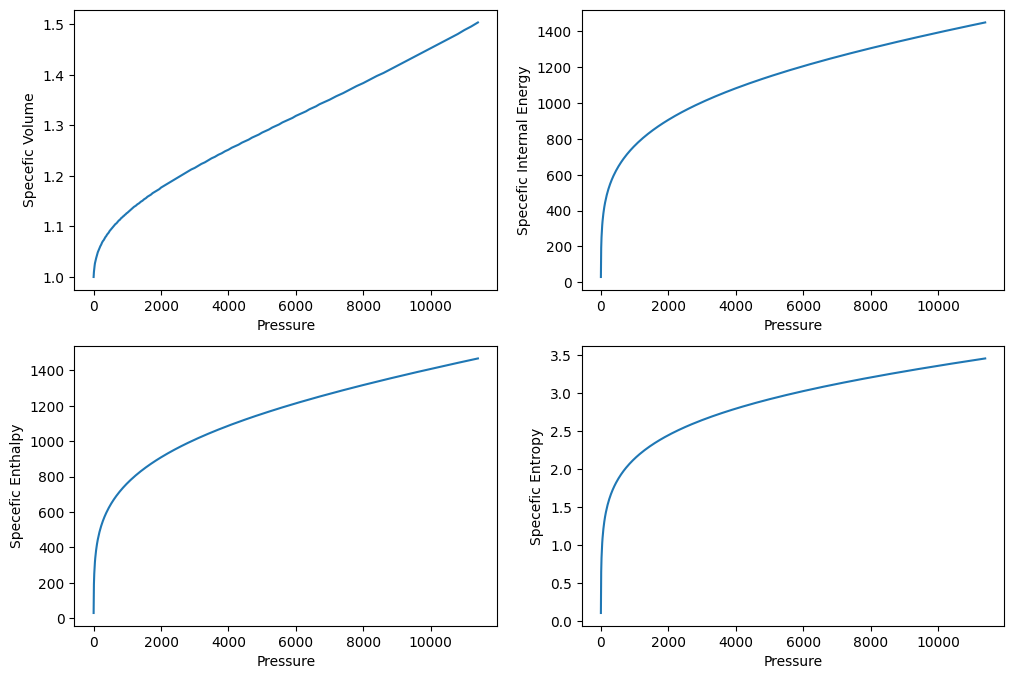

In [59]:
#your code here
#your code here
pressure = df['Pressure'].loc[df['Property']=='V'].tolist()
v = df['Liq_Sat'].loc[df['Property']=='V'].tolist()
u = df['Liq_Sat'].loc[df['Property']=='U'].tolist()
h = df['Liq_Sat'].loc[df['Property']=='H'].tolist()
s = df['Liq_Sat'].loc[df['Property']=='S'].tolist()

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(pressure,v)
plt.xlabel('Pressure')
plt.ylabel('Specefic Volume')

plt.subplot(2,2,2)
plt.plot(pressure,u)
plt.xlabel('Pressure')
plt.ylabel('Specefic Internal Energy')

plt.subplot(2,2,3)
plt.plot(pressure,h)
plt.xlabel('Pressure')
plt.ylabel('Specefic Enthalpy')

plt.subplot(2,2,4)
plt.plot(pressure,s)
plt.xlabel('Pressure')
plt.ylabel('Specefic Entropy')

###Plot the specific volume of saturated liquid between 300 kPa and 1500 kPa

Text(0, 0.5, 'Specific Volume')

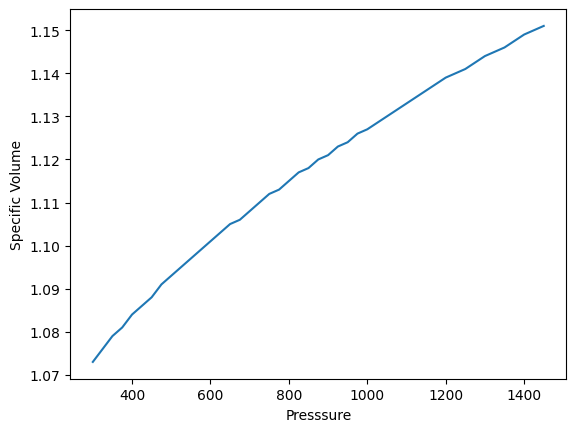

In [60]:
#your code here
start = df.index[df['Pressure']==300][0]
end = df.index[df['Pressure']==1500][0]

df_new = df.iloc[start:end]
v = df_new['Liq_Sat'].loc[ (df_new['Property']=='V')].tolist()
pressure = df_new['Pressure'].loc[(df_new['Property']=='V')].tolist()

plt.plot(pressure,v)
plt.xlabel('Presssure')
plt.ylabel('Specific Volume')

#Linear Regression
You're given a 100 data points generated from the function
$y=mx+c$. Some noise is added to the y values.

**Task:** Estimate the values of m and c using linear regression. Write a suitable cost function and update the parameters.

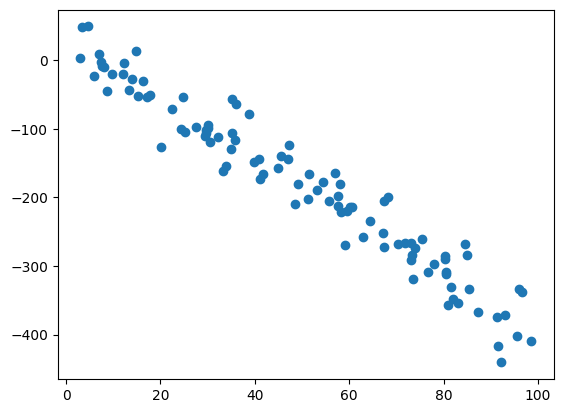

In [48]:
 # Generation of data points
x = np.random.rand(100)*100
y = -4*x+15
y = y+np.random.randn(100)*30
plt.scatter(x,y)

Iteration 0, Cost: 46852.00054288443
Iteration 100, Cost: 1028.027888062595
Iteration 200, Cost: 1026.0731517169384
Iteration 300, Cost: 1024.136736970758
Iteration 400, Cost: 1022.2184720970548
Iteration 500, Cost: 1020.3181869784135
Iteration 600, Cost: 1018.4357130919173
Iteration 700, Cost: 1016.5708834942019
Iteration 800, Cost: 1014.7235328066507
Iteration 900, Cost: 1012.8934972007299
Iteration 1000, Cost: 1011.080614383457
Iteration 1100, Cost: 1009.2847235830093
Iteration 1200, Cost: 1007.5056655344687
Iteration 1300, Cost: 1005.7432824656936
Iteration 1400, Cost: 1003.9974180833295
Iteration 1500, Cost: 1002.2679175589484
Iteration 1600, Cost: 1000.5546275153171
Iteration 1700, Cost: 998.8573960127956
Iteration 1800, Cost: 997.1760725358639
Iteration 1900, Cost: 995.5105079797719
Iteration 2000, Cost: 993.860554637319
Iteration 2100, Cost: 992.2260661857515
Iteration 2200, Cost: 990.6068976737888
Iteration 2300, Cost: 989.0029055087673
Iteration 2400, Cost: 987.413947443908
I

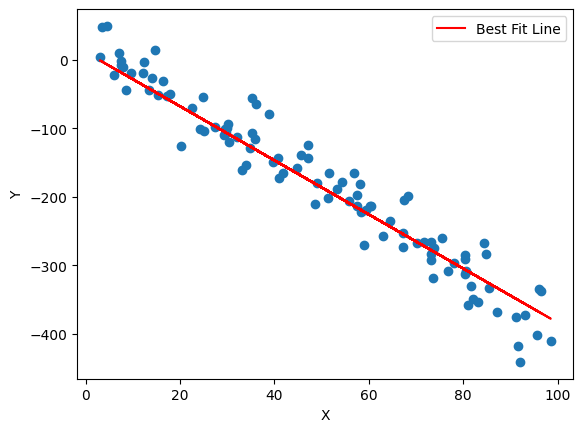

Final values: m = -3.944964975018038, c = 11.17041404419575


In [54]:
# Initial values for slope (m) and y-intercept (c)
m = 0
c = 0

# Hyperparameters
learning_rate = 0.0001
iterations = 10000

# Perform gradient descent
for _ in range(iterations):
    # Calculate predicted y values
    y_pred = m * x + c

    # Calculate the cost function (mean squared error)
    cost = np.mean((y_pred - y)**2)

    # Calculate the gradients with respect to m and c
    gradient_m = (2/len(x)) * np.sum((y_pred - y) * x)
    gradient_c = (2/len(x)) * np.sum(y_pred - y)

    # Update m and c using the gradient and learning rate
    m -= learning_rate * gradient_m
    c -= learning_rate * gradient_c

    # Print the cost every 100 iterations
    if _ % 100 == 0:
        print(f'Iteration {_}, Cost: {cost}')

# Plot the best fit line
y_best_fit = m * x + c
plt.plot(x, y_best_fit, color='red', label='Best Fit Line')
plt.scatter(x,y)

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Print the final values of m and c
print(f'Final values: m = {m}, c = {c}')

In [41]:
# Initialisng parameters m and c such that the best fit line is given by y = m*x+c

#Cost function to be minimised

#Function for updating parameter



Run the model

In [58]:
# define number of iterations for minimising cost function

# define the learning rate #


Iteration 0, Cost: 26617.185068778643
Iteration 100, Cost: inf
Iteration 200, Cost: nan
Iteration 300, Cost: nan
Iteration 400, Cost: nan
Iteration 500, Cost: nan
Iteration 600, Cost: nan
Iteration 700, Cost: nan
Iteration 800, Cost: nan
Iteration 900, Cost: nan


<ipython-input-45-4e5516b5c7c8>:19: RuntimeWarning: overflow encountered in square
  return np.mean((y_true - y_pred)**2) / 2
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-45-4e5516b5c7c8>:31: RuntimeWarning: invalid value encountered in double_scalars
  m = m - learning_rate * dm


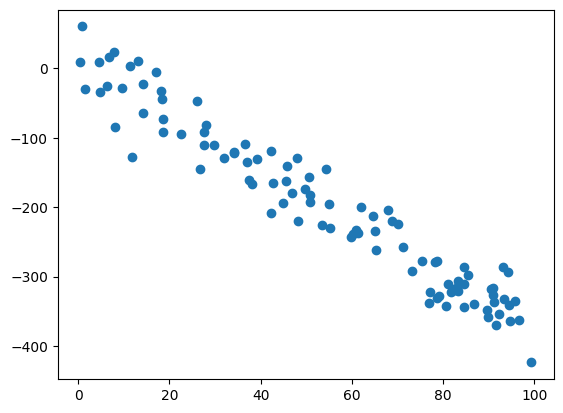

In [55]:
print(m,c)  # value should be close to (-4,15)

-3.944964975018038 11.17041404419575
